In [1]:
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [77]:
# # 自己模型
# fpr_1 = np.load('data/miR2Disease/f_tpr/fpr_1.npy')
# tpr_1 = np.load('data/miR2Disease/f_tpr/tpr_1.npy')
# # AMHMDA
# fpr_2 = np.load('Compare/AMHMDA/data/miR2Disease/f_tpr/fpr_1.npy')
# tpr_2 = np.load('Compare/AMHMDA/data/miR2Disease/f_tpr/tpr_1.npy')
# # MHCLMDA
# fpr_3 = np.load('Compare/MHCLMDA/data/miR2Disease/f_tpr/fpr_1.npy')
# tpr_3 = np.load('Compare/MHCLMDA/data/miR2Disease/f_tpr/tpr_1.npy')
# # MINIMDA
# fpr_4 = np.load('Compare/MINIMDA/data/miR2Disease/f_tpr/fpr_1.npy')
# tpr_4 = np.load('Compare/MINIMDA/data/miR2Disease/f_tpr/tpr_1.npy')
# # MMGCN
# fpr_5 = np.load('Compare/MMGCN/data/miR2Disease/f_tpr/fpr_1.npy')
# tpr_5 = np.load('Compare/MMGCN/data/miR2Disease/f_tpr/tpr_1.npy')

# fenleiqi
# DF
fpr_1 = np.load('data/miR2Disease/DF/fpr_1.npy')
tpr_1 = np.load('data/miR2Disease/DF/tpr_1.npy')
# RF
fpr_2 = np.load('data/miR2Disease/RF/fpr_1.npy')
tpr_2 = np.load('data/miR2Disease/RF/tpr_1.npy')
# XGBoost
fpr_3 = np.load('data/miR2Disease/XGBoost/fpr_1.npy')
tpr_3 = np.load('data/miR2Disease/XGBoost/tpr_1.npy')
# MLP
fpr_4 = np.load('data/miR2Disease/MLP/fpr_1.npy')
tpr_4 = np.load('data/miR2Disease/MLP/tpr_1.npy')
# KAN
fpr_5 = np.load('data/miR2Disease/f_tpr/fpr_1.npy')
tpr_5 = np.load('data/miR2Disease/f_tpr/tpr_1.npy')

# fpr_6 = np.load('fpr_6.npy')
# tpr_6 = np.load('tpr_6.npy')
# 
# fpr_7 = np.load('fpr_7.npy')
# tpr_7 = np.load('tpr_7.npy')
# 
# fpr_8 = np.load('fpr_8.npy')
# tpr_8 = np.load('tpr_8.npy')
# 
# fpr_9 = np.load('fpr_9.npy')
# tpr_9 = np.load('tpr_9.npy')
# 
# fpr_10 = np.load('fpr_10.npy')
# tpr_10 = np.load('tpr_10.npy')

In [25]:
fpr_1 = pd.DataFrame(fpr_1) # 162rows
tpr_1 = pd.DataFrame(tpr_1) # 162rows

fpr_2 = pd.DataFrame(fpr_2) # 152rows
tpr_2 = pd.DataFrame(tpr_2) # 152rows

fpr_3 = pd.DataFrame(fpr_3) # 176rows
tpr_3 = pd.DataFrame(tpr_3) # 176rows

fpr_4 = pd.DataFrame(fpr_4) # 142rows
tpr_4 = pd.DataFrame(tpr_4) # 142rows

fpr_5 = pd.DataFrame(fpr_5) # 154rows
tpr_5 = pd.DataFrame(tpr_5) # 154rows

# fpr_6 = pd.DataFrame(fpr_6) # 166rows
# tpr_6 = pd.DataFrame(tpr_6) # 166rows
# 
# fpr_7 = pd.DataFrame(fpr_7) # 160rows
# tpr_7 = pd.DataFrame(tpr_7) # 160rows
# 
# fpr_8 = pd.DataFrame(fpr_8) # 160rows
# tpr_8 = pd.DataFrame(tpr_8) # 160rows
# 
# fpr_9 = pd.DataFrame(fpr_9) # 165rows
# tpr_9 = pd.DataFrame(tpr_9) # 165rows
# 
# fpr_10 = pd.DataFrame(fpr_10) # 168rows
# tpr_10 = pd.DataFrame(tpr_10) # 168rows

In [78]:
# fpr_list = [fpr_1, fpr_2, fpr_3, fpr_4, fpr_5, fpr_6, fpr_7, fpr_8, fpr_9, fpr_10]
# tpr_list = [tpr_1, tpr_2, tpr_3, tpr_4, tpr_5, tpr_6, tpr_7, tpr_8, tpr_9, tpr_10]
fpr_list = [fpr_1, fpr_2, fpr_3, fpr_4, fpr_5]
tpr_list = [tpr_1, tpr_2, tpr_3, tpr_4, tpr_5]

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import auc

def moving_average(data, window_size):
    """ 使用移动平均平滑数据 """
    if len(data) < window_size:
        return data  # 数据太短，不进行平滑
    window = np.ones(window_size) / window_size
    data_padded = np.pad(data, (window_size // 2, window_size - 1 - window_size // 2), mode='edge')
    return np.convolve(data_padded, window, mode='valid')

def plot_roc_curves_with_average(fprs, tprs, title="ROC Curves (10-Fold Cross-Validation)"):
    plt.figure(figsize=(10, 8))

    all_fpr_tpr = {}  # 用于存储所有折的数据
    max_len = max(len(fpr) for fpr in fprs)  # 获取最长的 FPR 长度
    fpr_new = np.linspace(0, 1, max_len)  # 生成统一的 FPR 轴

    # 遍历每一折，进行插值和平滑
    for i in range(len(fprs)):
        roc_auc = auc(fprs[i], tprs[i])
        
        # 确保 FPR 具有唯一值
        unique_fpr, unique_indices = np.unique(fprs[i], return_index=True)
        unique_tpr = tprs[i][unique_indices]

        # 进行线性插值
        f = interp1d(unique_fpr, unique_tpr, kind='linear', fill_value="extrapolate")
        tpr_new = f(fpr_new)

        # 进行移动平均平滑
        window_size = max(3, len(tpr_new) // 50)
        tpr_smooth = moving_average(tpr_new, window_size)
        tpr_smooth = np.clip(tpr_smooth, 0, 1)  # 限制 TPR 范围

        # 绘制曲线
        plt.plot(fpr_new, tpr_smooth, lw=0.8, alpha=0.5, label=f'Fold {i+1} (AUC = {roc_auc:.4f})')

        # **存储数据**
        all_fpr_tpr[f'Fold_{i+1}_FPR'] = fpr_new
        all_fpr_tpr[f'Fold_{i+1}_TPR'] = tpr_smooth


    # 绘制随机参考线
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')

    # **设置图形参数**
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(False)  # 取消网格

    # **保存图像**
    plt.savefig('perfect_roc_no_grid.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
    plt.show()

    # **保存所有 FPR 和 TPR 到 CSV**
    all_fpr_tpr['Average_FPR'] = fpr_new


    df_fpr_tpr = pd.DataFrame(all_fpr_tpr)
    df_fpr_tpr.to_csv("processed-data/fpr_tpr_miR2fengleiqi.csv", index=False)
    print("✅ FPR 和 TPR 已保存到 fpr_tpr_per_fold_with_average.csv")

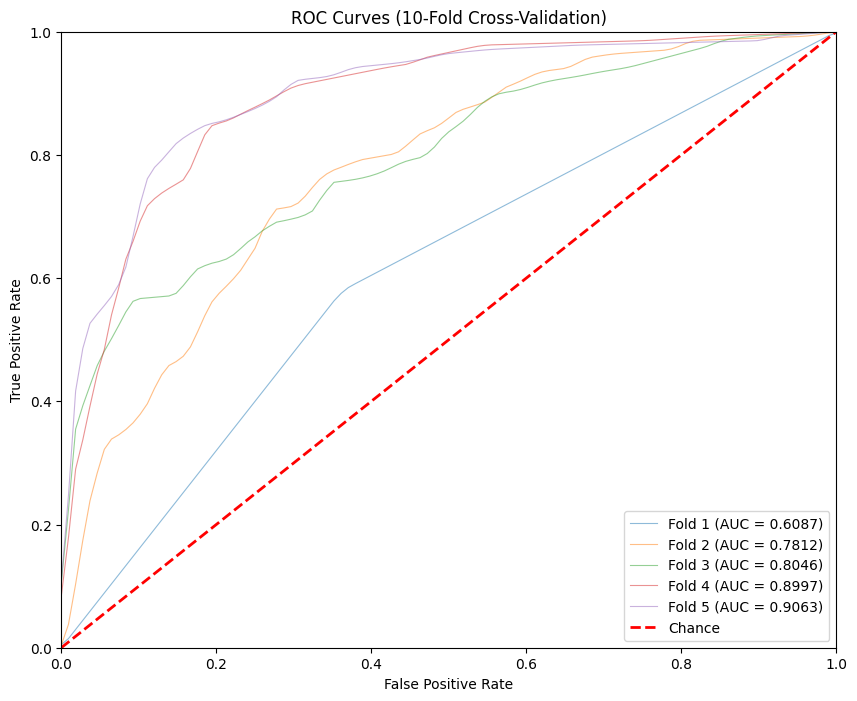

✅ FPR 和 TPR 已保存到 fpr_tpr_per_fold_with_average.csv


In [80]:
plot_roc_curves_with_average(fpr_list, tpr_list)

In [ ]:
# aupt

In [81]:
# # 自己模型
# p_1 = np.load('data/miR2Disease/p_r/p_1.npy')
# r_1 = np.load('data/miR2Disease/p_r/r_1.npy')
# # AMHMDA
# p_2 = np.load('Compare/AMHMDA/data/miR2Disease/p_r/p_1.npy')
# r_2 = np.load('Compare/AMHMDA/data/miR2Disease/p_r/r_1.npy')
# # MHCLMDA
# p_3 = np.load('Compare/MHCLMDA/data/miR2Disease/p_r/p_1.npy')
# r_3 = np.load('Compare/MHCLMDA/data/miR2Disease/p_r/r_1.npy')
# # MINIMDA
# p_4 = np.load('Compare/MINIMDA/data/miR2Disease/p_r/p_1.npy')
# r_4 = np.load('Compare/MINIMDA/data/miR2Disease/p_r/r_1.npy')
# # MMGCN
# p_5 = np.load('Compare/MMGCN/data/miR2Disease/p_r/p_1.npy')
# r_5 = np.load('Compare/MMGCN/data/miR2Disease/p_r/r_1.npy')

# fenleiqi
# DF
p_1 = np.load('data/miR2Disease/DF/p_1.npy')
r_1 = np.load('data/miR2Disease/DF/r_1.npy')
# RF
p_2 = np.load('data/miR2Disease/RF/p_1.npy')
r_2 = np.load('data/miR2Disease/RF/r_1.npy')
# XGB
p_3 = np.load('data/miR2Disease/XGBoost/p_1.npy')
r_3 = np.load('data/miR2Disease/XGBoost/r_1.npy')
# MLP
p_4 = np.load('data/miR2Disease/MLP/p_1.npy')
r_4 = np.load('data/miR2Disease/MLP/r_1.npy')
# KAN
p_5 = np.load('data/miR2Disease/p_r/p_1.npy')
r_5 = np.load('data/miR2Disease/p_r/r_1.npy')

In [82]:
p_list = [p_1, p_2, p_3, p_4, p_5]
r_list = [r_1, r_2, r_3, r_4, r_5]

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import auc

def moving_average(data, window_size):
    """ 使用移动平均平滑数据 """
    if len(data) < window_size:
        return data
    window = np.ones(window_size) / window_size
    data_padded = np.pad(data, (window_size // 2, window_size - 1 - window_size // 2), mode='edge')
    return np.convolve(data_padded, window, mode='valid')

def plot_pr_curves_with_average(recalls, precisions, title="PR Curves (10-Fold Cross-Validation)"):
    plt.figure(figsize=(10, 8))

    all_rec_pre = {}
    max_len = max(len(r) for r in recalls)
    recall_new = np.linspace(0, 1, max_len)  # 统一 recall 轴

    for i in range(len(recalls)):
        # 确保 recall 单调递增且唯一
        unique_recall, unique_indices = np.unique(recalls[i], return_index=True)
        unique_precision = precisions[i][unique_indices]

        # 进行插值
        f = interp1d(unique_recall, unique_precision, kind='linear', fill_value="extrapolate")
        precision_new = f(recall_new)

        # 平滑
        window_size = max(3, len(precision_new) // 50)
        precision_smooth = moving_average(precision_new, window_size)
        precision_smooth = np.clip(precision_smooth, 0, 1)

        # AUC-PR（可选）
        pr_auc = auc(recall_new, precision_smooth)

        plt.plot(recall_new, precision_smooth, lw=0.8, alpha=0.5, label=f'Fold {i+1} (AUC = {pr_auc:.4f})')

        all_rec_pre[f'Fold_{i+1}_Recall'] = recall_new
        all_rec_pre[f'Fold_{i+1}_Precision'] = precision_smooth

    # 图形设置
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.grid(False)
    plt.legend(loc='lower left')

    # 保存图
    # plt.savefig('perfect_pr_no_grid.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
    plt.show()

    # 保存数据到 CSV
    all_rec_pre['Average_Recall'] = recall_new
    df_pr = pd.DataFrame(all_rec_pre)
    df_pr.to_csv("processed-data/p_r_miR2fengleiqi.csv", index=False)
    print("✅ Precision 和 Recall 已保存到 precision_recall_per_fold_with_average.csv")

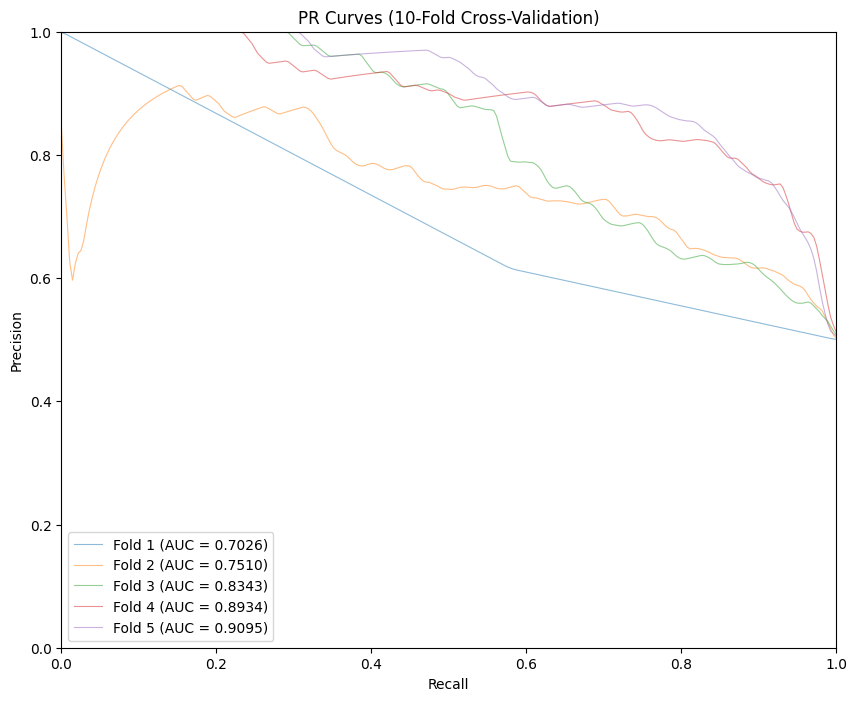

✅ Precision 和 Recall 已保存到 precision_recall_per_fold_with_average.csv


In [84]:
plot_pr_curves_with_average(r_list, p_list)

In [43]:
fpr_list

[array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.40192450e-04, 7.40192450e-04, 7.40192450e-04,
        7.40192450e-04, 7.40192450e-04, 7.40192450e-04, 7.401924

In [33]:
# 1. 找到最长的 fpr 的长度
max_length = max(len(fpr) for fpr in fpr_list)

In [34]:
max_length

641

In [35]:
# 2. 插值对齐
interpolated_fprs = []
for fpr in fpr_list:
    # 创建插值函数
    x_orig = np.linspace(0, 1, len(fpr))  # 原始 x 值
    f = interpolate.interp1d(x_orig, fpr, kind='linear')  # 线性插值
    # 插值到 max_length
    x_new = np.linspace(0, 1, max_length)
    interpolated_fpr = f(x_new)
    interpolated_fprs.append(interpolated_fpr)

# 3. 计算平均 fpr
# average_fpr = np.mean(interpolated_fprs, axis=0)

In [36]:
fpr_list = pd.DataFrame(fpr_list)

In [37]:
fpr_list = fpr_list.T

In [38]:
fpr_list

,0,1,2,3,4
0,0.0,0.00000,0.000000,0.000000,0.00000
1,0.0,0.00000,0.000000,0.002219,0.00000
2,0.0,0.00000,0.000000,0.002959,0.00000
3,0.0,0.00074,0.000000,0.002959,0.00074
4,0.0,0.00074,0.000000,0.002959,0.00074
...,...,...,...,...,...
636,NaN,NaN,0.998521,NaN,NaN
637,NaN,NaN,0.999260,NaN,NaN
638,NaN,NaN,0.999260,NaN,NaN
639,NaN,NaN,1.000000,NaN,NaN


In [6]:
# average_fpr

In [8]:
# average_fpr = pd.DataFrame(average_fpr)
# average_fpr

,0
0,0.000000
1,0.000000
2,0.000000
3,0.001352
4,0.001842
...,...
171,0.624681
172,0.666283
173,0.777740
174,0.796411


In [7]:
# 1. 找到最长的 tpr 的长度
max_length_ = max(len(tpr) for tpr in tpr_list)

In [8]:
# 2. 插值对齐
interpolated_tprs = []
for tpr in tpr_list:
    # 创建插值函数
    x_orig = np.linspace(0, 1, len(tpr))  # 原始 x 值
    f = interpolate.interp1d(x_orig, tpr, kind='linear')  # 线性插值
    # 插值到 max_length
    x_new = np.linspace(0, 1, max_length_)
    interpolated_tpr = f(x_new)
    interpolated_tprs.append(interpolated_tpr)

# 3. 计算平均 fpr
# average_tpr = np.mean(interpolated_tprs, axis=0)

In [9]:
# average_tpr

In [10]:
# average_tpr = pd.DataFrame(average_tpr)
# average_tpr

In [11]:
from sklearn.metrics import roc_curve,precision_recall_curve,auc

In [14]:
auc(average_fpr, average_tpr)

0.96311526784163

In [40]:
average_tpr.to_csv('csv/tpr/average_tpr.csv', index=False, header=False)

In [16]:
def plot_roc_curves_with_average(fprs, tprs, title="ROC Curves (10-Fold Cross-Validation)"):
   """
   绘制十折交叉验证的ROC曲线，并将所有曲线和平均曲线绘制在一张图中。

   Args:
       fprs: 包含每一折的fpr列表 (list of numpy arrays)。
       tprs: 包含每一折的tpr列表 (list of numpy arrays)。
       average_fpr: 十折交叉验证的平均fpr (numpy array)。
       average_tpr: 十折交叉验证的平均tpr (numpy array)。
       title: 图的标题 (string)。
   """

   plt.figure(figsize=(10, 8))  # Adjust figure size as needed

   # 绘制每一折的ROC曲线
   for i in range(len(fprs)):
       roc_auc = auc(fprs[i], tprs[i])
       plt.plot(fprs[i], tprs[i], lw=1, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.4f})')


   # 绘制对角线
   plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')

   # 设置图的属性
   plt.xlim([-0.05, 1.05])
   plt.ylim([-0.05, 1.05])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title(title)
   plt.legend(loc="lower right")
   plt.grid(True)  # Add grid for better readability
   plt.savefig('1.png',dpi=600, bbox_inches='tight', pad_inches=0.1)
   
   plt.show()

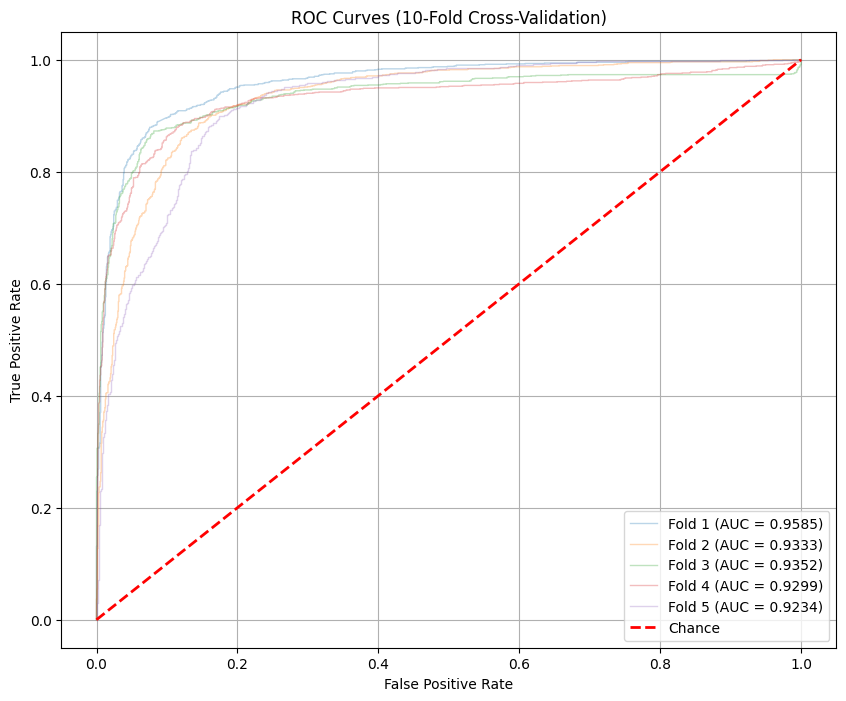

In [17]:
plot_roc_curves_with_average(fpr_list, tpr_list)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import auc

def plot_roc_curves_with_average(fprs, tprs, average_fpr, average_tpr, title="ROC Curves (10-Fold Cross-Validation)"):
    plt.figure(figsize=(10, 8))

    for i in range(len(fprs)):
        if fprs[i][0] > 0:
            fprs[i] = np.insert(fprs[i], 0, 0)
            tprs[i] = np.insert(tprs[i], 0, 0)
        if fprs[i][-1] < 1:
            fprs[i] = np.append(fprs[i], 1)
            tprs[i] = np.append(tprs[i], 1)

    max_len = max(len(fpr) for fpr in fprs)
    fpr_new = np.linspace(0, 1, max_len)

    tprs_interp = []

    for i in range(len(fprs)):
        roc_auc = auc(fprs[i], tprs[i])

        # 去除重复的 FPR 值
        unique_fpr, unique_indices = np.unique(fprs[i], return_index=True)
        unique_tpr = tprs[i][unique_indices]

        # 进行插值
        f = interp1d(unique_fpr, unique_tpr, kind='quadratic', fill_value="extrapolate")
        tpr_new = f(fpr_new)

        window_size = max(3, len(tpr_new) // 50)
        tpr_smooth = moving_average(tpr_new, window_size)

        tprs_interp.append(tpr_smooth)

        plt.plot(fpr_new, tpr_smooth, lw=1, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.4f})')

    average_roc_auc = auc(average_fpr, average_tpr)

    unique_avg_fpr, unique_avg_indices = np.unique(average_fpr, return_index=True)
    unique_avg_tpr = average_tpr[unique_avg_indices]

    f_avg = interp1d(unique_avg_fpr, unique_avg_tpr, kind='quadratic', fill_value="extrapolate")
    tpr_avg_new = f_avg(fpr_new)
    tpr_avg_smooth = moving_average(tpr_avg_new, window_size)

    plt.plot(fpr_new, tpr_avg_smooth, color='b', label=f'Average ROC (AUC = {average_roc_auc:.4f})', lw=2)

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')

    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)

    plt.savefig('perfect_roc.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
    plt.show()

def moving_average(data, window_size):
    if len(data) < window_size:
        return data
    window = np.ones(window_size) / window_size
    data_padded = np.pad(data, (window_size // 2, window_size - 1 - window_size // 2), mode='edge')
    return np.convolve(data_padded, window, mode='valid')



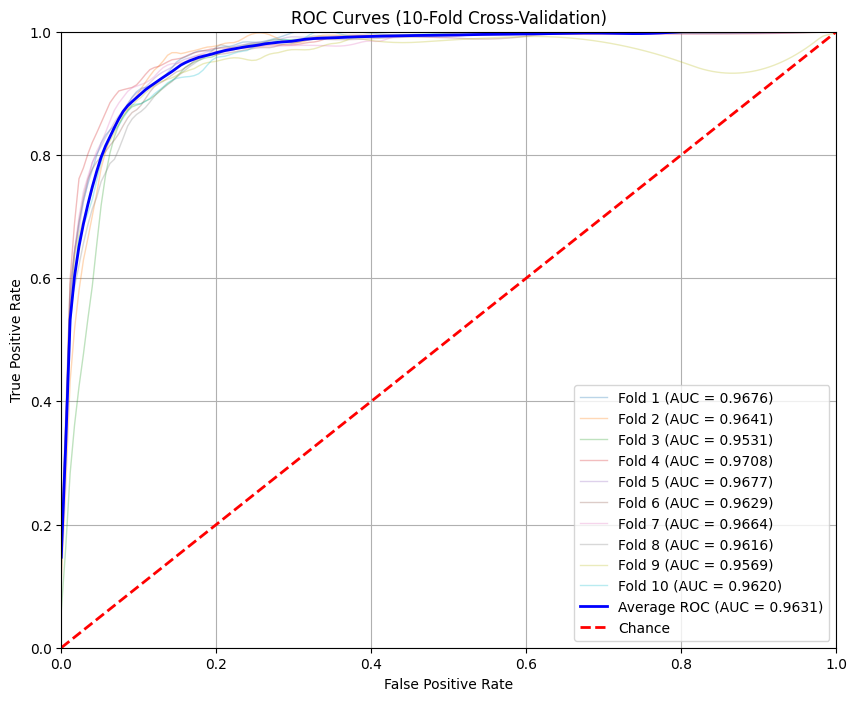

In [20]:
plot_roc_curves_with_average(fpr_list, tpr_list, average_fpr, average_tpr)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import auc

def moving_average(data, window_size):
    """ 使用移动平均平滑数据 """
    if len(data) < window_size:
        return data  # 数据太短，不进行平滑
    window = np.ones(window_size) / window_size
    data_padded = np.pad(data, (window_size // 2, window_size - 1 - window_size // 2), mode='edge')
    return np.convolve(data_padded, window, mode='valid')

def plot_roc_curves_with_average(fprs, tprs, average_fpr, average_tpr, title="ROC Curves (10-Fold Cross-Validation)"):
    plt.figure(figsize=(10, 8))

    all_fpr_tpr = {}  # 用于存储所有折的数据
    max_len = max(len(fpr) for fpr in fprs)  # 获取最长的 FPR 长度
    fpr_new = np.linspace(0, 1, max_len)  # 生成统一的 FPR 轴

    # 遍历每一折，进行插值和平滑
    for i in range(len(fprs)):
        roc_auc = auc(fprs[i], tprs[i])
        
        # 确保 FPR 具有唯一值
        unique_fpr, unique_indices = np.unique(fprs[i], return_index=True)
        unique_tpr = tprs[i][unique_indices]

        # 进行线性插值
        f = interp1d(unique_fpr, unique_tpr, kind='linear', fill_value="extrapolate")
        tpr_new = f(fpr_new)

        # 进行移动平均平滑
        window_size = max(3, len(tpr_new) // 50)
        tpr_smooth = moving_average(tpr_new, window_size)
        tpr_smooth = np.clip(tpr_smooth, 0, 1)  # 限制 TPR 范围

        # 绘制曲线
        plt.plot(fpr_new, tpr_smooth, lw=0.8, alpha=0.5, label=f'Fold {i+1} (AUC = {roc_auc:.4f})')

        # **存储数据**
        all_fpr_tpr[f'Fold_{i+1}_FPR'] = fpr_new
        all_fpr_tpr[f'Fold_{i+1}_TPR'] = tpr_smooth

    # 处理平均 ROC 曲线
    average_roc_auc = auc(average_fpr, average_tpr)
    unique_avg_fpr, unique_avg_indices = np.unique(average_fpr, return_index=True)
    unique_avg_tpr = average_tpr[unique_avg_indices]

    f_avg = interp1d(unique_avg_fpr, unique_avg_tpr, kind='linear', fill_value="extrapolate")
    tpr_avg_new = f_avg(fpr_new)
    tpr_avg_smooth = moving_average(tpr_avg_new, window_size)
    tpr_avg_smooth = np.clip(tpr_avg_smooth, 0, 1)  # 限制 TPR 范围

    # 绘制平均 ROC 曲线
    plt.plot(fpr_new, tpr_avg_smooth, color='blue', lw=3, label=f'Average ROC (AUC = {average_roc_auc:.4f})')

    # 绘制随机参考线
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')

    # **设置图形参数**
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(False)  # 取消网格

    # **保存图像**
    plt.savefig('perfect_roc_no_grid.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
    plt.show()

    # **保存所有 FPR 和 TPR 到 CSV**
    all_fpr_tpr['Average_FPR'] = fpr_new
    all_fpr_tpr['Average_TPR'] = tpr_avg_smooth

    df_fpr_tpr = pd.DataFrame(all_fpr_tpr)
    df_fpr_tpr.to_csv("fpr_tpr_per_fold_with_average.csv", index=False)
    print("✅ FPR 和 TPR 已保存到 fpr_tpr_per_fold_with_average.csv")



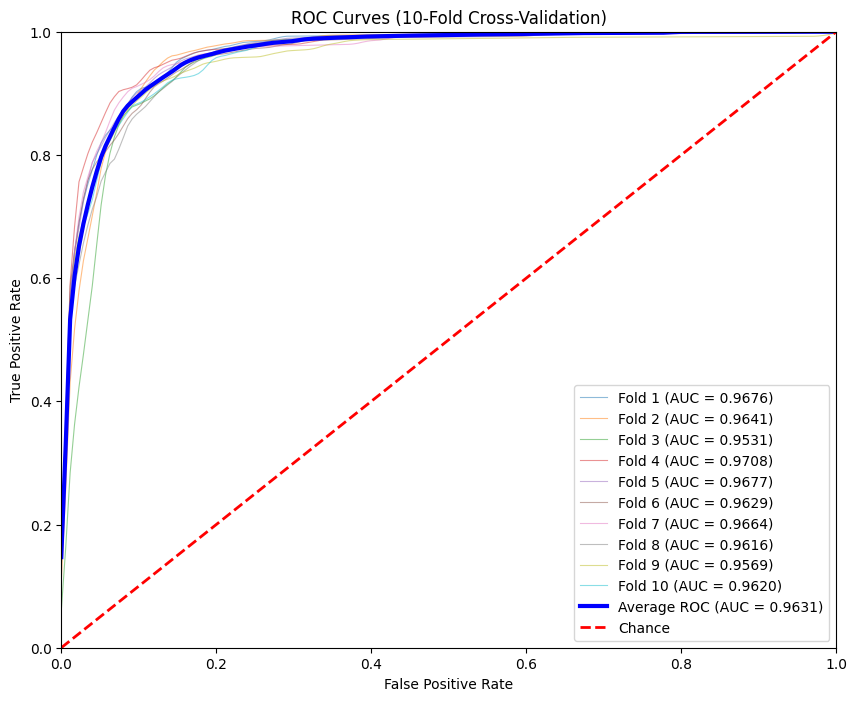

✅ FPR 和 TPR 已保存到 fpr_tpr_per_fold_with_average.csv


In [22]:
plot_roc_curves_with_average(fpr_list, tpr_list, average_fpr, average_tpr)

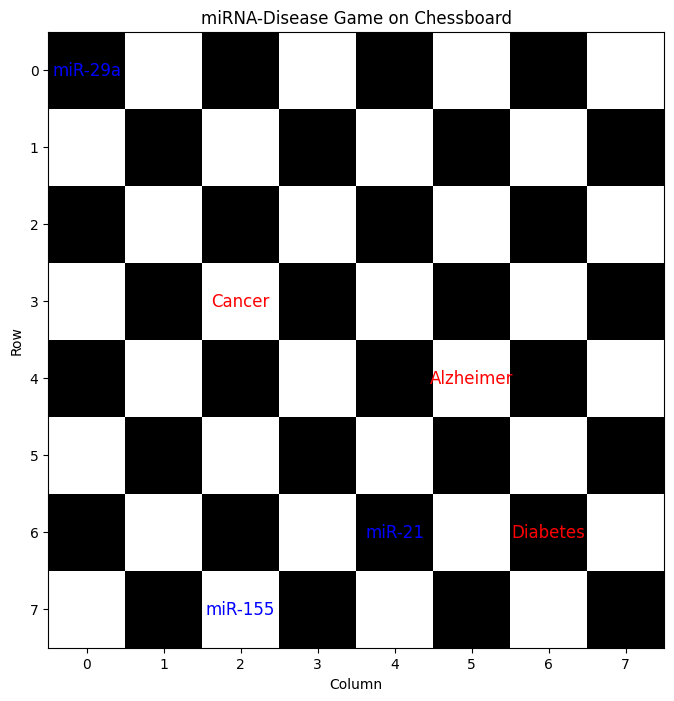

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 定义棋盘大小和棋子
board_size = 8  # 棋盘大小 (8x8)
miRNAs = ['miR-21', 'miR-155', 'miR-29a']
diseases = ['Cancer', 'Alzheimer', 'Diabetes']

# 2. 创建棋盘数据
board = np.zeros((board_size, board_size))
board[1::2, ::2] = 1  # 设置黑色格子
board[::2, 1::2] = 1

# 3. 创建棋子位置 (随机放置)
np.random.seed(42)  # 设置随机种子，保证结果可重复
miRNA_positions = np.random.choice(board_size * board_size, len(miRNAs), replace=False)
disease_positions = np.random.choice(board_size * board_size, len(diseases), replace=False)

miRNA_coords = [(pos // board_size, pos % board_size) for pos in miRNA_positions]
disease_coords = [(pos // board_size, pos % board_size) for pos in disease_positions]

# 4. 绘制棋盘
plt.figure(figsize=(8, 8))
plt.imshow(board, cmap='gray', interpolation='nearest')

# 5. 绘制棋子
for i, (row, col) in enumerate(miRNA_coords):
    plt.text(col, row, miRNAs[i], ha='center', va='center', color='blue', fontsize=12)

for i, (row, col) in enumerate(disease_coords):
    plt.text(col, row, diseases[i], ha='center', va='center', color='red', fontsize=12)

# 6. 设置坐标轴
plt.xticks(np.arange(board_size))
plt.yticks(np.arange(board_size))
plt.xlabel("Column")
plt.ylabel("Row")

# 7. 添加标题
plt.title('miRNA-Disease Game on Chessboard')

# 8. 显示图形
plt.show()


D:\SoftwareDownload\Python\Anaconda\envs\pytorch_dgl\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\SoftwareDownload\Python\Anaconda\envs\pytorch_dgl\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24102 (\N{CJK UNIFIED IDEOGRAPH-5E26}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\SoftwareDownload\Python\Anaconda\envs\pytorch_dgl\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26377 (\N{CJK UNIFIED IDEOGRAPH-6709}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\SoftwareDownload\Python\Anaconda\envs\pytorch_dgl\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22635 (\N{CJK UNIFIED IDEOGRAPH-586B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
D:\SoftwareDownload\Python\Anaconda\envs\pytorch_dgl\lib\site-packages\IPython\c

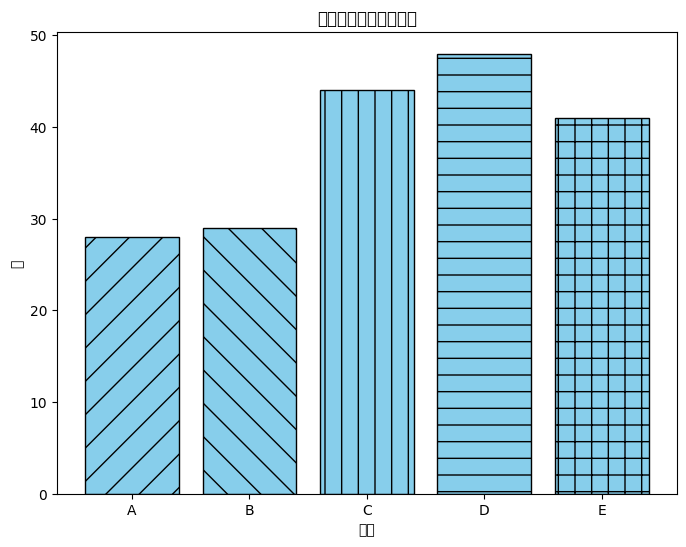

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# 示例数据
categories = ['A', 'B', 'C', 'D', 'E']
values = np.random.randint(10, 50, size=5)

# 不同的填充图案
hatch_patterns = ['/', '\\', '|', '-', '+']

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, values, color='skyblue', edgecolor='black')

# 为每个柱子设置不同的填充图案
for bar, hatch in zip(bars, hatch_patterns):
    bar.set_hatch(hatch)

plt.xlabel('类别')
plt.ylabel('值')
plt.title('带有填充图案的柱状图')
plt.show()
